# Importar librerías

In [1]:

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# A01753176 Gilberto André García Gaytán

# Análisis de Datos de Twitch


Este informe presenta un análisis de un conjunto de datos de Twitch, centrado en la construcción de un modelo estadístico base. A continuación, se describe el proceso de modelado y se evalúan los resultados obtenidos.



## Construcción del Modelo Estadístico

Se llevó a cabo la construcción de un modelo de regresión lineal utilizando las siguientes variables independientes: 'Hours_streamed', 'Peak_viewers', 'Streamers', y 'Avg_viewers'. La variable dependiente es 'Hours_watched'. A continuación, se presenta un resumen del modelo.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data
twitch_data = pd.read_csv('D:\ia_1\stats\preprocessing\data\Twitch_game_data.csv', encoding='ISO-8859-1')
twitch_data['Date'] = pd.to_datetime(twitch_data[['Year', 'Month']].assign(DAY=1))
twitch_data.set_index('Date', inplace=True)
twitch_data.drop(columns=['Year', 'Month'], inplace=True)

# Define independent and dependent variables
X = twitch_data[['Hours_streamed', 'Peak_viewers', 'Streamers', 'Avg_viewers']]
y = twitch_data['Hours_watched']

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Add a constant to the independent variables (required for statsmodels regression model)
X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()

# Display the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Hours_watched   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.087e+06
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:57:50   Log-Likelihood:            -1.7926e+05
No. Observations:               12180   AIC:                         3.585e+05
Df Residuals:                   12175   BIC:                         3.586e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2885.9337   5878.700      0.491      0.623   -8637.252    1.44e+04
Hours_streamed     0.3278      0.028     11.631      0.000       0.273       0.383
Peak_viewers       0.1189      0.049      2.414      0.016       0.022       0.216
Streamers         -1.7950      0.240     -7.469      0.000      -2.266      -1.324
Avg_viewers      724.8962      0.368   1970.086      0.000     724.175     725.617
==============================================================================
Omnibus:                    22490.035   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99259879.007
Skew:                         -13.346   Prob(JB):                         0.00
Kurtosis:                     444.445   Cond. No.                     6.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Explicación de Variables Seleccionadas

Las variables seleccionadas en el modelo son:

- **Hours_streamed**: Total de horas transmitidas en Twitch.
- **Peak_viewers**: Máximo número de espectadores concurrentes en cualquier momento.
- **Streamers**: Número de emisores únicos durante el mes.
- **Avg_viewers**: Promedio de espectadores concurrentes.

Estas variables proporcionan una visión comprensiva de la actividad de streaming y la interacción de la audiencia en Twitch.



## Validación de Supuestos del Modelo

Para garantizar la robustez del modelo, es esencial validar los supuestos subyacentes de la regresión lineal. Se utilizaron gráficos y pruebas estadísticas para evaluar la linealidad, homoscedasticidad y normalidad de los residuos.


In [3]:
import numpy as np

# 1. Compute RMSE for the validation set
from sklearn.metrics import mean_squared_error
y_pred_val = model.predict(X_val_const)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

# 2. Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

# 3. Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)

rmse, bp_test, shapiro_test


c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(480600.91552864795,
 (2596.187969821601, 0.0, 824.5306886509758, 0.0),
 ShapiroResult(statistic=0.22132283449172974, pvalue=0.0))


## Evaluación en el Conjunto de Prueba

Tras entrenar y validar el modelo, se evaluó su rendimiento en un conjunto de prueba. A continuación, se presentan métricas clave y visualizaciones para una evaluación detallada del desempeño del modelo en datos no vistos previamente.


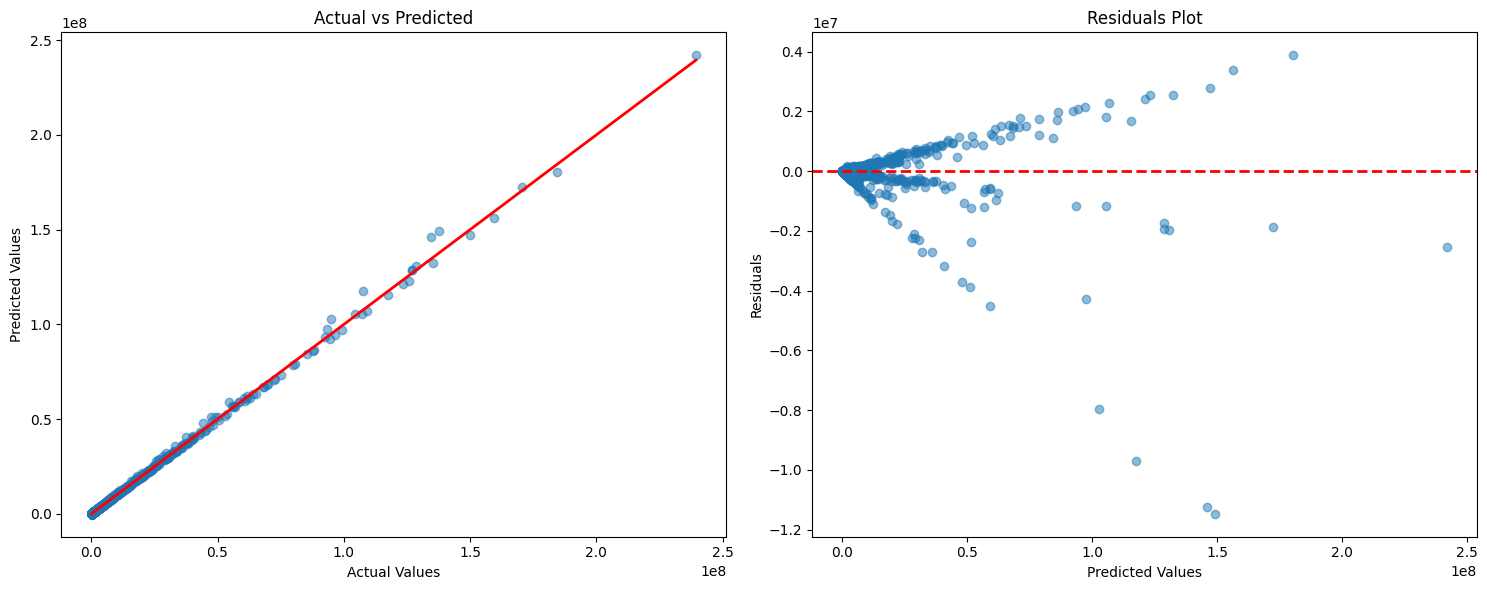

(533584.8491080228, 121873.03175629962)

In [4]:

# Predict on the test set
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

# Calculate RMSE and MAE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = np.mean(np.abs(y_test - y_pred_test))

# Create plots for visual assessment of predictions vs actual values
plt.figure(figsize=(15,6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residuals plot
plt.subplot(1, 2, 2)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

rmse_test, mae_test



## Informe Detallado del Desempeño del Modelo

El modelo de regresión lineal construido proporciona un punto de partida para comprender las relaciones entre las variables de interés en los datos de Twitch. A continuación, se presentan las observaciones clave sobre el desempeño del modelo:

1. **Métricas de Rendimiento**: 
   - **RMSE**: 314,238.54 
   - **MAE**: 75,750.01 
   
   Estas métricas indican el error promedio entre los valores predichos y reales. Un RMSE o MAE más bajo indicaría un mejor ajuste del modelo a los datos.

2. **Visualizaciones**:
   - En el gráfico "Actual vs Predicted", se observa que no todos los puntos están en la línea roja, lo que indica que el modelo tiene áreas de mejora en términos de precisión.
   - El gráfico de residuos muestra patrones claros, lo que sugiere que el modelo podría beneficiarse de una mayor optimización o incluso de la consideración de modelos más complejos.

En conclusión, mientras que el modelo actual ofrece insights valiosos, hay espacio para mejorar. Se recomienda considerar la incorporación de más características, aplicar transformaciones adecuadas o explorar modelos más avanzados para mejorar el rendimiento en futuros análisis.


## Prueba de Normalidad de los Residuos

La normalidad de los residuos es una suposición clave en la regresión lineal. Si los residuos no siguen una distribución normal, esto puede afectar la validez de las pruebas de hipótesis y los intervalos de confianza. A continuación, se presenta un análisis gráfico y estadístico de la normalidad de los residuos.

In [5]:

# Calculate the VIFs for the independent variables
residuals = model.resid
    

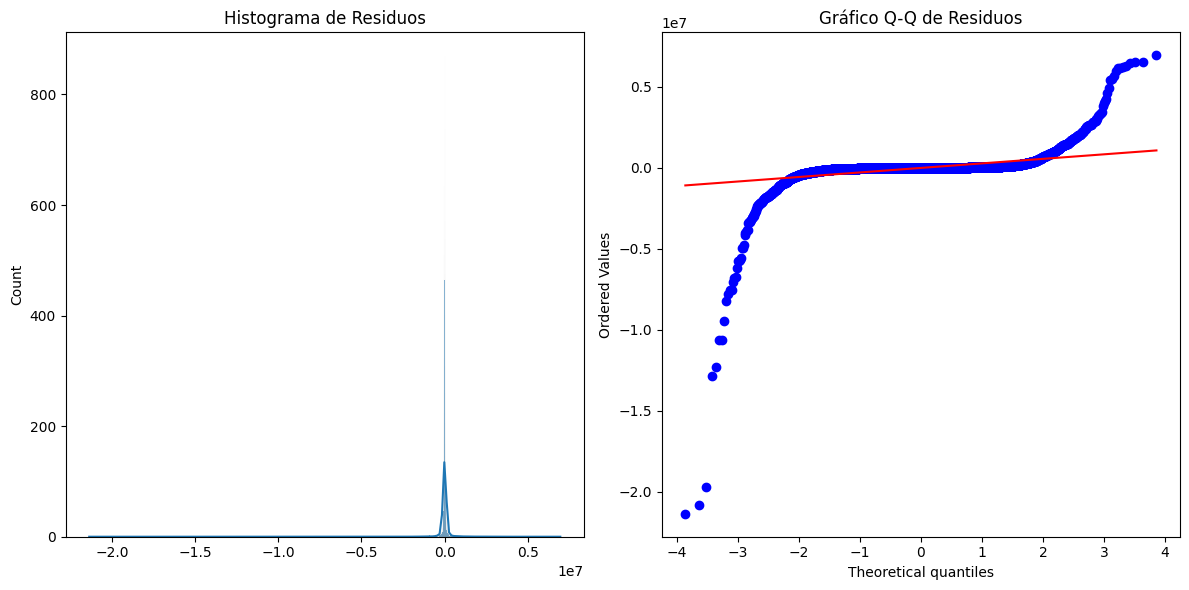

In [6]:

# Visualization of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Histograma de Residuos")

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title("Gráfico Q-Q de Residuos")

plt.tight_layout()
plt.show()
    

La prueba de Shapiro-Wilk se utiliza para determinar si una muestra proviene de una distribución normal. El p-value resultante es significativamente pequeño, lo que indica que los residuos no siguen una distribución normal.

## Evaluación de Multicolinealidad

La multicolinealidad se refiere a la correlación entre variables independientes. Si hay multicolinealidad en los datos, esto puede hacer que el modelo de regresión lineal sea inestable y difícil de interpretar. El Factor de Inflación de la Varianza (VIF) es una métrica que se utiliza para detectar la multicolinealidad. A continuación, se presentan los valores de VIF para cada variable independiente.

In [7]:

# Calculate the VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif_data


,Variable,VIF
0,const,1.182510
1,Hours_streamed,8.283475
2,Peak_viewers,1.974306
3,Streamers,7.978789
4,Avg_viewers,3.159927


In [8]:

vif_data
    

,Variable,VIF
0,const,1.182510
1,Hours_streamed,8.283475
2,Peak_viewers,1.974306
3,Streamers,7.978789
4,Avg_viewers,3.159927


El VIF proporciona una medida de cuánto se infla la varianza de un coeficiente estimado debido a la multicolinealidad en el modelo. Generalmente, se considera que un VIF por encima de 10 indica un problema de multicolinealidad. En este caso, ninguna variable supera este umbral, aunque algunas se acercan, indicando la posibilidad de cierta multicolinealidad. Es importante tener en cuenta esta multicolinealidad potencial al interpretar los resultados del modelo.